In [23]:
# import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, AveragePooling2D
# from tensorflow.keras import Activations
from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import confusion_matrix, classification_report
# from google.colab import files
from tensorflow.keras.preprocessing import image

import pandas as pd
import numpy as np
import os
import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5113109286572596094
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1431034267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 698995737355564908
physical_device_desc: "device: 0, name: NVIDIA GeForce MX130, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
%matplotlib inline

# from google.colab import drive
# drive.mount('/content/gdrive')

0 angry
1 disgust
2 happy
3 afraid
4 sad
5 surprise
6 neutral

In [4]:
base_path_data = 'D:/belajar/PA/dataset/[5-result]/'
os.listdir(base_path_data)

['.git',
 '20220206',
 '20220301',
 '20220326',
 '20220326-1',
 '20220328',
 'readme.txt']

In [43]:
# ISI DI SINI!
PICKED_VERSION = '20220326-1'
path_data = base_path_data + PICKED_VERSION + '/'
labels=['0', '1', '2', '3', '4', '5', '6']

In [44]:
base_log_path = 'D:/belajar/PA/dataset/_log/'
os.listdir(base_log_path)

['1-20220206',
 '10-20220225',
 '11-20220227',
 '12-20220301',
 '13-20220301',
 '14-20220304',
 '15-20220317',
 '16-20220321',
 '17-20220322',
 '18-20220327',
 '19-20220328',
 '2-20220207',
 '20-20220328',
 '3-20220207',
 '4-20220214',
 '5-20220215',
 '6-20220215',
 '7-20220219',
 '8-20220219',
 '9-20220225',
 'CONFUSION-MATRIX',
 'Log SEMANGATT.xlsx',
 '~$Log SEMANGATT.xlsx']

In [67]:
LOG_VERSION = '22-20220328'
log_path = base_log_path + LOG_VERSION + '/'
os.mkdir(log_path)

In [68]:
datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(path_data+'train/',
                                              target_size=(128, 128),
                                              batch_size=16,
                                              class_mode='categorical',
                                              classes=labels,
                                              )
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(path_data+'test/',
                                              target_size=(128, 128),
                                              batch_size=16,
                                              class_mode='categorical',
                                              classes=labels)

Found 2037 images belonging to 7 classes.
Found 510 images belonging to 7 classes.


# filter size itu harus ganjil biar optimal
> 1x1 , 3x3, 5x5, 7x7
klo lebih dari 128 filter_size nya (5x5)

# biar training nya optimal pakai deep residual.
Contoh : 

```
conv2d_1,
conv2d_2,
relu_1,

conv2d_3
conv2d_4
relu_2
```



intinya, layer conv nya dua baru ada satu activation function

terus buat layer dense juga kayak gitu boleh
padding nya tiap layer jadiin "same" dan stride dikasih stride (1,1) atau (2,2)
kalau pake stride gak perlu max_pooling

janlup, yang di augmentasi itu training set ajaloh
kalau distribusi nya sama kan nanti overfitting

In [69]:
model = Sequential([
                Input(shape=(128,128, 3)),
                Conv2D(128, kernel_size=(5, 5), strides=(2, 2)),
                Conv2D(128, kernel_size=(5, 5), strides=(2, 2)),
                Activation('relu'),
                BatchNormalization(),
    
                Conv2D(64, kernel_size=(3, 3), strides=(2, 2)),
                Conv2D(64, kernel_size=(3, 3), strides=(2, 2)),
                Activation('relu'),
                BatchNormalization(),
    
                Conv2D(64, kernel_size=(3, 3), strides=(1, 1)),
                Conv2D(64, kernel_size=(3, 3), strides=(1, 1)),
                Activation('relu'),
                BatchNormalization(),

                Flatten(),

                Dense(128, kernel_initializer='glorot_normal'),
                Activation('relu'),
#                 Dropout(0.2),
                Dense(64, kernel_initializer='glorot_normal'),
                Activation('relu'),
                Dense(7, activation='softmax')
    ])


In [70]:
# model = Sequential([
#                 tf.keras.Input(shape=(128,128,3)),
#                 Conv2D(128, kernel_size=(5, 5), strides=(2, 2)),
#                 Activation('relu'),

#                 Conv2D(128, kernel_size=(3, 3), strides=(2, 2)),
#                 Activation('relu'),

#                 Conv2D(64, kernel_size=(3, 3), strides=(2, 2)),
#                 Activation('relu'),

#                 Conv2D(64, kernel_size=(3, 3), strides=(2, 2)),
#                 Activation('relu'),

#                 Conv2D(64, kernel_size=(1, 1), strides=(1, 1)),
#                 Conv2D(64, kernel_size=(1, 1), strides=(1, 1)),
#                 Activation('relu'),

#                 # Dropout(0.7),
#                 Flatten(),
#                 Dense(128, kernel_initializer='glorot_normal'),
#                 Dense(128, kernel_initializer='glorot_normal'),
#                 Activation('relu'),

#                 Dense(128, kernel_initializer='glorot_normal'),
#                 Dense(64, kernel_initializer='glorot_normal'),
#                 Activation('relu'),

#                 Dense(64, kernel_initializer='glorot_normal'),
#                 Activation('relu'),

#                 Dense(64, kernel_initializer='glorot_normal'),
#                 Dense(64, kernel_initializer='glorot_normal'),
#                 Activation('relu'),
#                 Dense(7, activation='softmax')
#     ])


In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 128)       9728      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 128)       409728    
_________________________________________________________________
activation_25 (Activation)   (None, 29, 29, 128)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 29, 29, 128)       512       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
activation_26 (Activation)   (None, 6, 6, 64)         

In [72]:
### compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', patience=5, mode='max')

In [73]:
import PIL
import PIL.Image

In [74]:
history = model.fit(train_generator, validation_data=test_generator, batch_size=16, epochs=30, validation_steps=16)

Epoch 1/30
128/128 [==============================] - 21s 154ms/step - loss: 1.9478 - accuracy: 0.2135 - val_loss: 2.2472 - val_accuracy: 0.1836
Epoch 2/30
128/128 [==============================] - 30s 231ms/step - loss: 1.6056 - accuracy: 0.3854 - val_loss: 1.7665 - val_accuracy: 0.3398
Epoch 3/30
128/128 [==============================] - 34s 263ms/step - loss: 1.3587 - accuracy: 0.4875 - val_loss: 1.6731 - val_accuracy: 0.3555
Epoch 4/30
128/128 [==============================] - 38s 295ms/step - loss: 1.1482 - accuracy: 0.5832 - val_loss: 1.4028 - val_accuracy: 0.5117
Epoch 5/30
128/128 [==============================] - 37s 286ms/step - loss: 1.0106 - accuracy: 0.6485 - val_loss: 1.4014 - val_accuracy: 0.4219
Epoch 6/30
128/128 [==============================] - 43s 333ms/step - loss: 0.8533 - accuracy: 0.6991 - val_loss: 1.4460 - val_accuracy: 0.4531
Epoch 7/30
128/128 [==============================] - 39s 309ms/step - loss: 0.7252 - accuracy: 0.7771 - val_loss: 1.0563 - val_ac

In [75]:
model.save(log_path+'model')

INFO:tensorflow:Assets written to: D:/belajar/PA/dataset/_log/22-20220328/model\assets


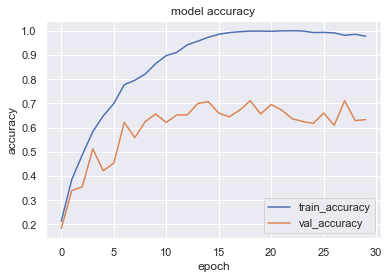

In [76]:
### plotting ringkasan dari proses learning/fit
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.savefig(log_path+'m_acc.png')
plt.show()


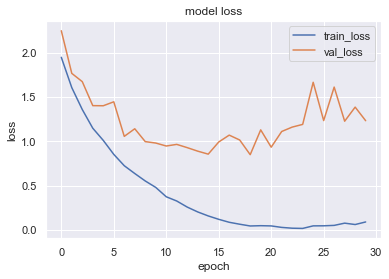

In [77]:
### plotting ringkasan dari proses learning/fit
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.savefig(log_path+'m_loss.png')
plt.show()

In [78]:
import pandas as pd
df = pd.DataFrame(history.history)

df.to_csv(log_path+'history.csv', index=False)

In [79]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_6"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_30", "trainable": true, "dtype": "float32", "filters": 128, "kernel_size": [5, 5], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_31", "trainable": true, "dtype": "float32", "filters": 128, "kernel_size": [5, 5], "strides": [2, 2], "padding": "valid", "data_format": "channels_last

# LOAD SAVED MODEL

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model(log_path+'model')

# load data

In [80]:
import seaborn as sns; sns.set_theme()
from numpy import unravel_index
# from sklearn.metrics import confusion_matrix

In [81]:
result = model.predict(test_generator)

In [82]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [83]:
# import csv
# def write_csv(data, file_name):
#     with open(file_name, 'w') as f:

#         # using csv.writer method from CSV package
#         write = csv.writer(f)
#         write.writerows(data)

In [84]:
normed_res = np.argmax(result, axis=1)

In [85]:
result

array([[3.2191499e-04, 1.1563840e-07, 3.4833229e-05, ..., 1.6799787e-04,
        5.3429884e-01, 2.8809611e-04],
       [1.0277606e-02, 4.2154195e-05, 1.0141582e-02, ..., 1.6414279e-01,
        1.4568031e-03, 2.6052754e-05],
       [8.0757629e-05, 9.9864370e-01, 4.9818238e-05, ..., 1.2169786e-03,
        1.3470287e-09, 2.4429241e-06],
       ...,
       [3.0693194e-05, 2.8976618e-04, 2.8018123e-05, ..., 1.8665643e-05,
        3.4290373e-01, 2.0909514e-02],
       [3.3454563e-07, 2.3453044e-06, 2.8119201e-05, ..., 7.5756361e-05,
        9.8474938e-01, 1.0251731e-04],
       [6.4168483e-02, 2.5228042e-06, 1.2455180e-02, ..., 4.5510015e-04,
        1.8319495e-02, 1.2382312e-03]], dtype=float32)

In [86]:
np.savetxt(log_path +"actual_label.csv", test_generator.classes.astype(np.uint8), delimiter=",")
np.savetxt(log_path +"predict_label.csv", result, delimiter=",")
np.savetxt(log_path +"use_predict_label.csv", normed_res, delimiter=",")

In [ ]:
# confusion_matrix(normed_res, test_generator.classes)

In [ ]:
# ax = sns.heatmap(normed_res, yticklabels=False)

In [ ]:
# model = load_model(path_data + 'model')

# def predict_emotion(img):
#     predictions = model.predict(img)
#     return predictions

In [ ]:
# print(path_data+'augmented-data/test/11202118-2-warkop-dki_pic_0000_22.9 1_faces.jpg')

In [ ]:
# img = cv2.imread(path_data+'augmented-data/test/11202118-2-warkop-dki_pic_0000_22.9 1_faces.jpg')

In [ ]:
# print(img)

In [ ]:
# model.predict(img)

In [ ]:
!python --version